In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing as preproc
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import pdvega

from draco.learn import preprocess
from draco.learn.helper import count_violations, current_weights
from draco.spec import Data, Field

%matplotlib inline

In [2]:
np.random.seed(1)

## Data preparation and learning functions

In [3]:
def prepare_data(data: pd.DataFrame):
    data = shuffle(data)
    
    split = int(len(data)/2)
    
    normal = data[:split]
    inverted = data[split:]
    
    a = normal.positive - normal.negative
    a['Y'] = 1
    
    b = inverted.negative - inverted.positive
    b['Y'] = 0
    
    return pd.concat([a, b]).sort_index()

In [4]:
def learn_weights(X_train, y_train, X_dev, y_dev):

    #clf = sklearn.linear_model.LogisticRegression()
    clf = svm.LinearSVC()
    clf.fit(X_train, y_train)

    #pred = clf.predict(X_dev)
    #score = clf.score(X_dev, y_dev)
    print(clf.score(X_train, y_train))
    print(clf.score(X_dev, y_dev))
    #print(y_test)

    #print(clf.coef_)

    used_feat_idx = [i for i in range(len(clf.coef_[0])) if clf.coef_[0][i] != 0.]

    return used_feat_idx

## Program

In [5]:
data = preprocess.load_data()

In [6]:
df = shuffle(data)
train, dev, test = np.split(df.sample(frac=1), [int(.7*len(df)), int(.8*len(df))])

train_data = df.iloc[:3]

          x         y  cat
0 -1.977250 -0.484537  pos
1  4.060821 -1.893943  pos
2 -1.125860 -2.574301  pos
3 -2.093804  1.142284  neg
4  3.229896  2.668213  neg
5 -2.093804  1.142284  neg


/usr/local/anaconda3/envs/asp/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda3/envs/asp/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda3/envs/asp/lib/python3.6/site-packages/pdvega/_utils.py:81: UserWarning: Unrecognized keywords in vgplot.scatter(): 'symbol'


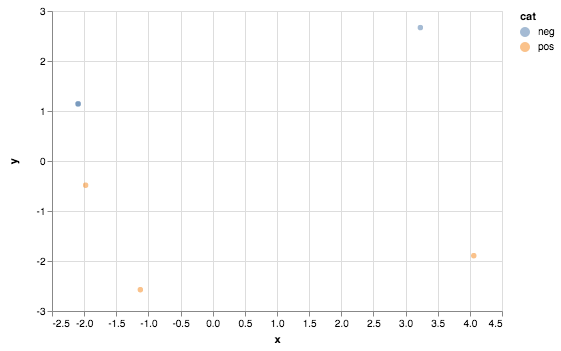

In [11]:
def prepare_plot_raw_data(data: pd.DataFrame):
    pos = data.positive
    pos['cat'] = 'pos'

    neg = data.negative
    neg['cat'] = 'neg'
    
    return pd.concat([pos, neg])

def plot_data(data):
    X = data.drop(columns=['cat'])
    
    pca = PCA(n_components=2)
    X2 = pd.DataFrame(pca.fit_transform(X))
    X2[2] = data.cat.values
    
    X2.columns = ['x', 'y', 'cat']
    
    print(X2)

    return X2.vgplot.scatter('x', 'y', c='cat', alpha=0.5, symbol='cat')

plot_data(prepare_plot_raw_data(train_data))